# Support Vector Machine

import library

In [17]:
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

Load Data

In [18]:
df = pd.read_csv('DataSVM.csv')
df.replace('?',-99999, inplace=True)
X = np.array(df.drop(['V3'],1))
y = np.array(df['V3'])
gamma = [2, 3, 4]
c_value = [i for i in range(0,10001,2000) ]
c_value[0] =c_value[0]+1
print (c_value)
print(gamma)
prevaccuracy = 0;


[1, 2000, 4000, 6000, 8000, 10000]
[2, 3, 4]


Kfold Validation

In [20]:

for cVal in range(len(c_value)):
	for ga in range(len(gamma)):
		totalAccuracy = 0
		totalCount = 0
		lis = []
		for i in range(30):	
			kf = KFold(n_splits=10,shuffle=True) #cross validation
			clf = svm.SVC(kernel='rbf',C=c_value[cVal], gamma=gamma[ga] )
			for train, test in kf.split(X):
				X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
				clf.fit(X_train, y_train)
				accuracy = clf.score(X_test, y_test)
				totalAccuracy = totalAccuracy+accuracy
				totalCount +=1
				lis.append(accuracy)
			avg_accu = float(totalAccuracy)/totalCount
			if(avg_accu > prevaccuracy):
				prevaccuracy = avg_accu
				finalC = c_value[cVal]
				finalG = gamma[ga]
		print("C", c_value[cVal] ," gamma" ,gamma[ga] ,"Average accuracy = ", round(avg_accu*100,2) ,"standardgaviation " ,round(np.std(np.array(lis))*100,2) ) 

C 1  gamma 2 Average accuracy =  97.75 standardgaviation  3.22
C 1  gamma 3 Average accuracy =  97.58 standardgaviation  3.43
C 1  gamma 4 Average accuracy =  97.45 standardgaviation  3.38
C 2000  gamma 2 Average accuracy =  96.83 standardgaviation  3.95
C 2000  gamma 3 Average accuracy =  97.02 standardgaviation  4.04
C 2000  gamma 4 Average accuracy =  96.7 standardgaviation  4.16
C 4000  gamma 2 Average accuracy =  97.08 standardgaviation  3.66
C 4000  gamma 3 Average accuracy =  97.15 standardgaviation  3.82
C 4000  gamma 4 Average accuracy =  96.67 standardgaviation  3.94
C 6000  gamma 2 Average accuracy =  97.03 standardgaviation  3.9
C 6000  gamma 3 Average accuracy =  97.22 standardgaviation  3.63
C 6000  gamma 4 Average accuracy =  96.63 standardgaviation  3.74
C 8000  gamma 2 Average accuracy =  97.05 standardgaviation  3.77
C 8000  gamma 3 Average accuracy =  96.95 standardgaviation  4.06
C 8000  gamma 4 Average accuracy =  96.75 standardgaviation  3.61
C 10000  gamma 2 Aver

From above Output Maximum accuracy is at C=1 and gamma = 2

plotting Data

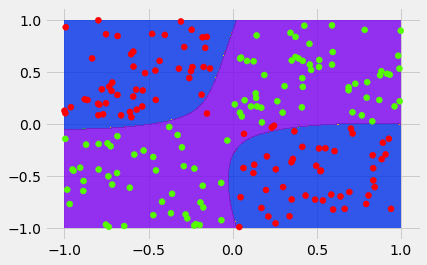

In [21]:
clf = svm.SVC(C=finalC, kernel='rbf',gamma=finalG)
clf.fit(X, y)
h =.001

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max()  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.prism, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism)
plt.show()

Output for RBF SVM

# SVM for Poly

In [22]:
deGree = [2,3,4]
c_value = [i for i in range(0,10001,2000) ]
c_value[0] =c_value[0]+1
print (c_value)
prevaccuracy = 0;

[1, 2000, 4000, 6000, 8000, 10000]


Kfold for poly

In [26]:
for cVal in range(len(c_value)):
	for de in range(len(deGree)):
		totalAccuracy = 0
		totalCount = 0
		lis = []
		for i in range(30):	
			kf = KFold(n_splits=10,shuffle=True) #cross validation
			clf = svm.SVC(kernel='poly',C=c_value[cVal], degree=deGree[de] )
			for train, test in kf.split(X):
				X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

				clf.fit(X_train, y_train)
				accuracy = clf.score(X_test, y_test)
				totalAccuracy = totalAccuracy+accuracy
				totalCount +=1
				lis.append(accuracy)
			avg_accu = float(totalAccuracy)/totalCount
			if(avg_accu >= prevaccuracy):
				prevaccuracy = avg_accu
				finalC = c_value[cVal]
				finalD = deGree[de]
		print("C", c_value[cVal] ," Degree" ,deGree[de] ,"Average accuracy = ", round(avg_accu*100,2) ,"standardDeviation " ,round(np.std(np.array(lis))*100,2) ) 


C 1  Degree 2 Average accuracy =  96.15 standardDeviation  5.03
C 1  Degree 3 Average accuracy =  41.1 standardDeviation  8.21
C 1  Degree 4 Average accuracy =  80.25 standardDeviation  11.84
C 2000  Degree 2 Average accuracy =  98.2 standardDeviation  3.45
C 2000  Degree 3 Average accuracy =  47.22 standardDeviation  10.21
C 2000  Degree 4 Average accuracy =  95.0 standardDeviation  4.86
C 4000  Degree 2 Average accuracy =  97.77 standardDeviation  3.27
C 4000  Degree 3 Average accuracy =  47.88 standardDeviation  9.36
C 4000  Degree 4 Average accuracy =  95.03 standardDeviation  4.81
C 6000  Degree 2 Average accuracy =  98.38 standardDeviation  2.79
C 6000  Degree 3 Average accuracy =  46.73 standardDeviation  10.31
C 6000  Degree 4 Average accuracy =  94.98 standardDeviation  4.59
C 8000  Degree 2 Average accuracy =  98.45 standardDeviation  2.62
C 8000  Degree 3 Average accuracy =  47.37 standardDeviation  10.63
C 8000  Degree 4 Average accuracy =  95.27 standardDeviation  4.29
C 1

From above Output Maximum accuracy is at C=10000 and gamma = 2

Plotting Data

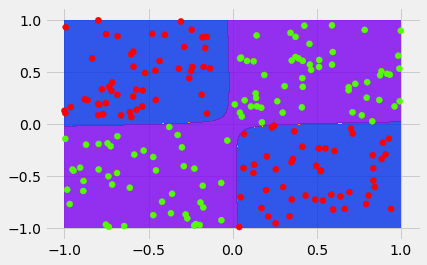

In [27]:
clf = svm.SVC(C=finalC, kernel='poly',degree=finalD)
clf.fit(X, y)
h =.001

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max()  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.prism, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism)
plt.show()

Output for poly svm

Better Accuracy is for poly svm as compare to rbf
poly Avg = 98.43